<img src="dataset-original.jpg" style="width: 500px;"/>

## Building an Artificial Neural N/w to predict the price of a new property on the market !

We perform EDA, feature engineer and build a Deep learning model to predict the price of a new property on the market in King County, Washington DC

### The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [385]:
df = pd.read_csv('../data/kc_house_data.csv')

# Exploratory Data Analysis

In [386]:
#Finding out missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### There is no missing data in the database and we can continue the EDA with no need for a substitution

In [387]:
#Trying to get a broad insight into the data
df.describe().transpose()

count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     21597.0  7.547345e-03  8.654900e-02  0.000000e+00   
view           21597.0  2.342918e-01  7.663898e-01  0.000000e+00   
condition      21597.0  3.409825e+00  6.505456e-01  1.000000e+00   
grade          21597.0  7.657915e+00  1.173200e+00  3.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
sqft_basement  21597.0  2.917250e+02  4.426678e+02  0.000000e+00   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   21597.0  8.446479e+01  4.018214e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

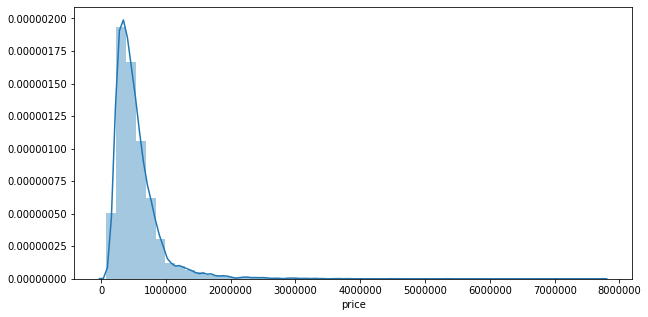

In [388]:
#Finding out the general trend of house prices
plt.figure(figsize=(10,5))
sns.distplot(df['price'])

### Most houses cost \\$1-2M, which makes sense. The probable problem we see with the data is that there are a small number of high value outliers which could skew the ML model. We make a mental note of this and proceed..

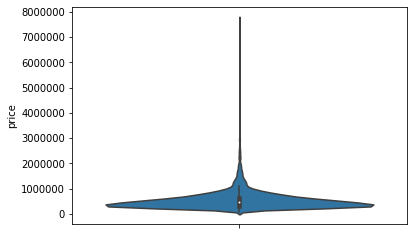

In [389]:
#To quickly verify this, let's plot a violin plot of the price
sns.violinplot(y='price',data=df)

#### This validates our assumption about skewed houses of high prices

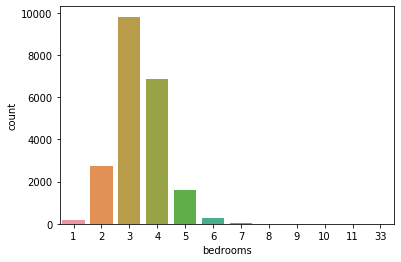

In [390]:
#Let's look at the histogram of the no. of bedrooms
sns.countplot(df['bedrooms'])

### Most houses have 1-6 bedrooms which is understandable considering the mix of urban and rural areas in King County. 
##### Someone also bought a 33 bedrooms' manor! Lucky him!

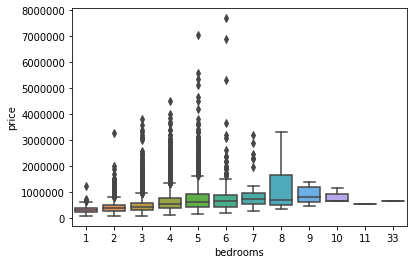

In [391]:
#Let's also look at how the bedrooms affected the price of the house
sns.boxplot(x='bedrooms',y='price',data=df)

### We observe a slight increase in the mean price of the houses with the no. of bedrooms but this is in not a strong correlation.

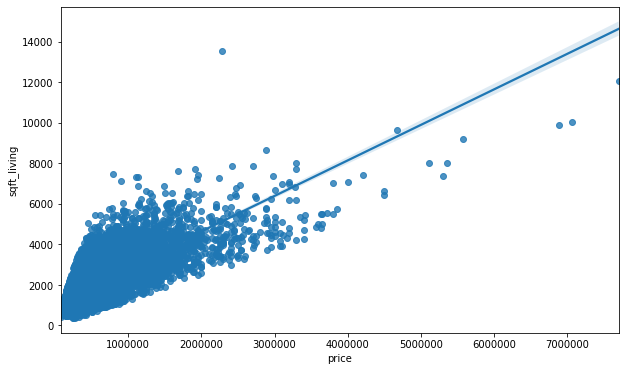

In [501]:
#Let's see how the pricing changes wrt the area of the house
plt.figure(figsize=(10,6))
sns.regplot(x='price',y='sqft_living',data=df)

### As expected, the prices increase linearly with the area of the house

## Let's move on to analysing the prices wrt Geography

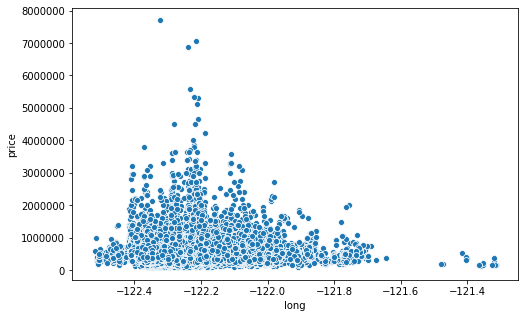

In [393]:
#Let's find out if the prices change with the longitude
plt.figure(figsize=(8,5))
sns.scatterplot(x='long',y='price',data=df)

### Indeed! the longitude -122.2 seems like a hot place. This also affects the prices of the areas around this longitude

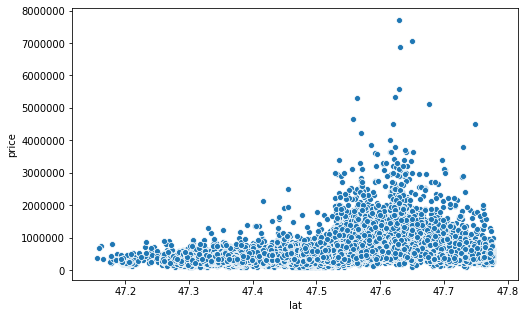

In [394]:
#Let's find out if the prices change with the latitude
plt.figure(figsize=(8,5))
sns.scatterplot(x='lat',y='price',data=df)

### We have a hot latitude too! Lat 47.65 seems like a place for costly houses, ranging from \\$4-8M

## Now, let's use both lat and long to look at the house prices to see if there is a trend

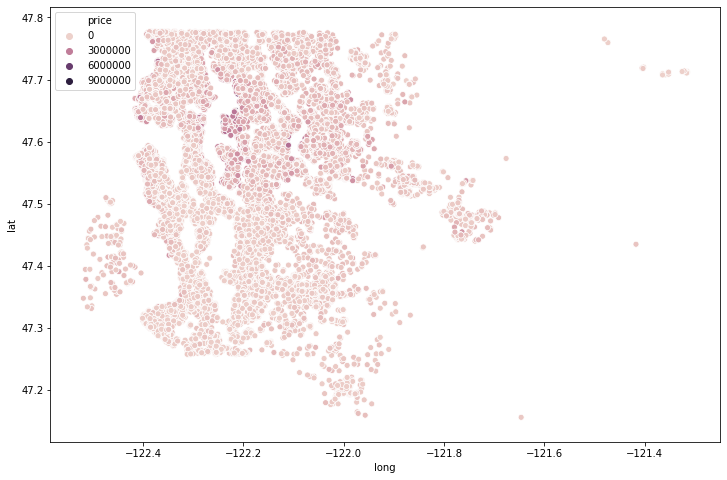

In [395]:
#Let's plot a  simple scatter plot first to see if the trend is discernible
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

### Meh! This does not look very good. Most of the points are very light and the problem seems to be the few very costly houses which we had identified earlier. Let's take correctives for this issue to get a better plot

In [396]:
#Let's look at how costly, the costliest 20 houses are
df.sort_values('price',ascending=False).head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
7245   6762700020  10/13/2014  7700000.0         6       8.00        12050   
3910   9808700762   6/11/2014  7060000.0         5       4.50        10040   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
4407   2470100110    8/4/2014  5570000.0         5       5.75         9200   
1446   8907500070   4/13/2015  5350000.0         5       5.00         8000   
1313   7558700030   4/13/2015  5300000.0         6       6.00         7390   
1162   1247600105  10/20/2014  5110000.0         5       5.25         8010   
8085   1924059029   6/17/2014  4670000.0         5       6.75         9640   
2624   7738500731   8/15/2014  4500000.0         5       5.50         6640   
8629   3835500195   6/18/2014  4490000.0         4       3.00         6430   
12358  6065300370    5/6/2015  4210000.0         5       6.00         7440   
4145   6447300265  10/14/2014  4000000.0         4       5.50         7080   
2083   8106100105  11/14/2014  3850000.0         4       4.25         5770   
7028    853200010    7/1/2014  3800000.0         5       5.50         7050   
19002  2303900100   9/11/2014  3800000.0         3       4.25         5510   
16288  7397300170   5/30/2014  3710000.0         4       3.50         5550   
18467  4389201095   5/11/2015  3650000.0         5       3.75         5020   
6502   4217402115   4/21/2015  3650000.0         6       4.75         5480   
15241  2425049063   9/11/2014  3640000.0         4       3.25         4830   
19133  3625049042  10/11/2014  3640000.0         5       6.00         5490   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245      27600     2.5           0     3  ...     13        8570   
3910      37325     2.0           1     2  ...     11        7680   
9245      31374     2.0           0     4  ...     13        8860   
4407      35069     2.0           0     0  ...     13        6200   
1446      23985     2.0           0     4  ...     12        6720   
1313      24829     2.0           1     4  ...     12        5000   
1162      45517     2.0           1     4  ...     12        5990   
8085      13068     1.0           1     4  ...     12        4820   
2624      40014     2.0           1     4  ...     12        6350   
8629      27517     2.0           0     0  ...     12        6430   
12358     21540     2.0           0     0  ...     12        5550   
4145      16573     2.0           0     0  ...     12        5760   
2083      21300     2.0           1     4  ...     11        5770   
7028      42840     1.0           0     2  ...     13        4320   
19002     35000     2.0           0     4  ...     13        4910   
16288     28078     2.0           0     2  ...     12        3350   
18467      8694     2.0           0     1  ...     12        3970   
6502      19401     1.5           1     4  ...     11        3910   
15241     22257     2.0           1     4  ...     11        4830   
19133     19897     2.0           0     0  ...     12        5490   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7245            3480      1910          1987    98102  47.6298 -122.323   
3910            2360      1940          2001    98004  47.6500 -122.214   
9245            1030      2001             0    98039  47.6305 -122.240   
4407            3000      2001             0    98039  47.6289 -122.233   
1446            1280      2009             0    98004  47.6232 -122.220   
1313            2390      1991             0    98040  47.5631 -122.210   
1162            2020      1999             0    98033  47.6767 -122.211   
8085            4820      1983          2009    98040  47.5570 -122.210   
2624             290      2004             0    98155  47.7493 -122.280   
8629               0      2001             0    98004  47.6208 -122.219   
12358           1890      2003             0    98006  47.5692 -122.189   
4145            1320      

### In the first 20 rows itself, the price drops from \\$7.7M to \\$3.6M!

### Let's try elimiating the top 2% of the costliest houses are retry the plot

In [397]:
#Top 2% records
len(df)*(0.02)

431.94

In [398]:
#Creating a df without the Top 2% records
non_top_2_perc = df.sort_values('price',ascending=False).iloc[432:]

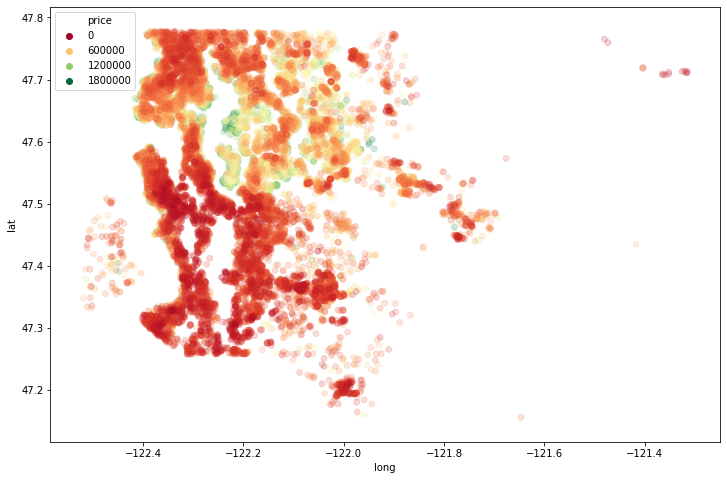

In [399]:
#Now let's plot it
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_2_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

### This plot seems a lot more discernible and we can see clear trends in the pricing!

#### But we do not know what to interpret from this. Let's use an image of King County and superimpose our trend on it to obtain inferences

In [400]:
ruh_m = plt.imread('kingcountymap.PNG')

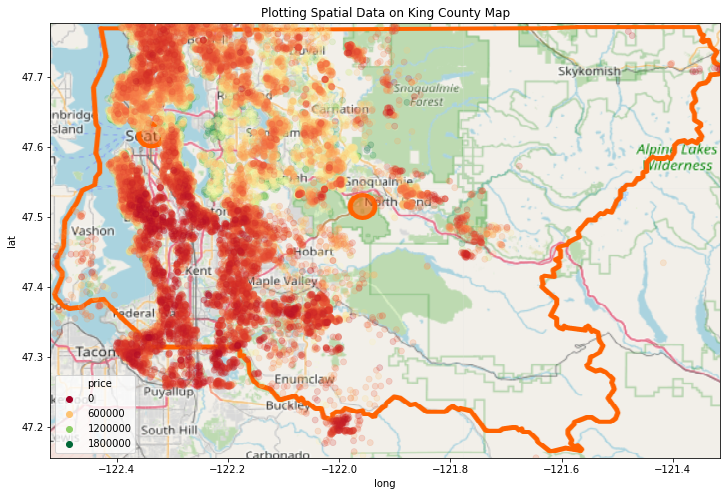

In [401]:
BBox = (non_top_2_perc.long.min(),   non_top_2_perc.long.max(),      
         non_top_2_perc.lat.min(), non_top_2_perc.lat.max())
        
fig, ax = plt.subplots(figsize = (12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_2_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)
ax.set_title('Plotting Spatial Data on King County Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'auto')

### Well this is good!

### We get a rough idea that Redmond, Mercer Island, Seattle have highly priced properties, whereas the price decreases down south.

#### We also see that find some indication that waterfront properties are in general costlier. Let's see what our data says about this.

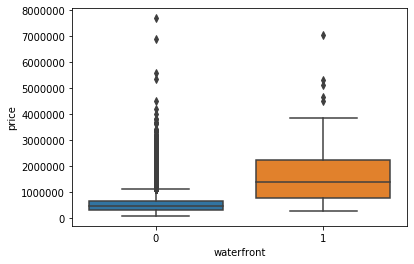

In [402]:
sns.boxplot(x='waterfront',y='price',data=df)

### Seems we were not wrong! Waterfront properties are indeed costlier.

#### This trend is interesting enough to plot the prices on a geolocation file, to look at the exact locations of high and low priced houses.

In [403]:
import folium

#Making Dataframes for highest and lowest priced houses
highest_df = df.sort_values('price',ascending=False)[20:220].reset_index()
lowest_df = df.sort_values('price')[20:520].reset_index()

#Normalizing the prices in these DFs to maintain size of markers
norm_highest_df = [float(i)/max(df.sort_values('price',ascending=False)['price'][20:]) for i in highest_df['price']]
norm_lowest_df = [float(i)/max(df.sort_values('price',ascending=False)['price'][20:]) for i in lowest_df['price']]

In [404]:
map = folium.Map(location=[47.5, -122.15], default_zoom_start=15)

#Plotting 200 costliest homes (barring the outliers)
for i in range(len(highest_df)):    
    folium.Circle(location=[highest_df['lat'][i], highest_df['long'][i]],
    radius=5,
    color="crimson",
    tooltip='$' + str(norm_highest_df[i]*max(highest_df['price'])),
    weight=20*norm_highest_df[i]).add_to(map)
    
#Plotting 500 cheapest homes (barring the outliers)
for i in range(len(lowest_df)):    
    folium.Circle(location=[lowest_df['lat'][i], lowest_df['long'][i]],
    radius=5,
    color="blue",
    tooltip='$' + str(norm_lowest_df[i]*max(lowest_df['price'])),
    weight=20*norm_lowest_df[i]).add_to(map)    

map

### Plotting it on a live map has paid off #ThankYouFolium

### We observe 2 major trends-
#### 1. Waterfront properties are significantly costlier
#### 2. Properties to the North are significantly costlier

### The 2nd observation is new and worth exploring more. Let us look at zipcode wise price distribution of the houses to see if particular locales of King County are richer

In [405]:
# Making a zip code wise df
dfbyzip = non_top_2_perc.groupby('zipcode').mean().reset_index(inplace=False)
dfbyzip = dfbyzip.astype({"zipcode": str})

In [406]:
import json

# load GeoJSON
with open('WAOFM_SAEP_Population_Estimates_WFL1.geojson', 'r') as jsonFile:
    data = json.load(jsonFile)
tmp = data

# remove ZIP codes not in our dataset
geozips = []
for i in range(len(tmp['features'])):
    if tmp['features'][i]['properties']['ZCTA5CE10'] in list(dfbyzip['zipcode'].unique()):
        geozips.append(tmp['features'][i])

# creating new JSON object
new_json = dict.fromkeys(['type','features'])
new_json['type'] = 'FeatureCollection'
new_json['features'] = geozips

# save JSON object as updated-file
open("updated-file.json", "w").write(
    json.dumps(new_json, sort_keys=True, indent=4, separators=(',', ': '))
)

7678798

In [407]:
# table = main table/data frame we read from (pandas DataFrame)
# zips = column name where ZIP codes are (string)
# mapped_feature = column name for feature we want to visualize (string)
# add_text = any additional commentary to be added in the map legend (string)

def create_map(table, zips, mapped_feature, add_text = ''):
    # reading of the updated GeoJSON file
    la_geo = r'updated-file.json'
    # initiating a Folium map with LA's longitude and latitude
    m = folium.Map(location = [47.35, -122.15], zoom_start = 9)
    # creating a choropleth map
    m.choropleth(
        geo_data = la_geo,
        fill_opacity = 0.7,
        line_opacity = 0.2,
        data = table,
        # refers to which key within the GeoJSON to map the ZIP code to
        key_on = 'feature.properties.ZCTA5CE10',
        # first element contains location information, second element contains feature of interest
        columns = [zips, mapped_feature],
        fill_color = 'RdYlGn',
        legend_name = (' ').join(mapped_feature.split('_')).title() + ' ' + add_text + 'Across King County, WA'
    )
    folium.LayerControl().add_to(m)
    # we can also save map with filename based on the feature of interest with below line, but we are interested in looking at the map in our own Jupyter notebook
    # m.save(outfile = mapped_feature + '_map.html')
    return(m)

In [502]:
create_map(dfbyzip, 'zipcode', 'price', 'of properties')

C:\Users\Pranav Tumkur\anaconda3\lib\site-packages\folium\folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## The distribution of house pricing with the directions is stronger than expected! Let's list down our observations..

### 1. Houses in the North and West are quite costlier
### 2. Almost all houses in the South are low priced
### 3. Properties around Lake Washington, viz. Mercer Island, Bellevue, Medina, Kirkland, are the costliest
### 4. Properties around urban areas, like Madison Park, University District and Eastgate are on the higher side
### 5. Waterfront properties in general are costlier, whereas houses on the mainland are relatively cheaper

In [409]:
#Just for fun, let us also see if the people in certain areas prefer more bedrooms!
create_map(dfbyzip, 'zipcode', 'bedrooms', 'of properties')

### Well! People on the mainland do seem to prefer/have higher number of bedrooms in their houses.

### Vashon Island and Enumclaw have the lowest avg. no. of bedrooms, though! Why?

## We'll continue the EDA, but now with Feature Data

In [410]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [412]:
df = df.drop('id',axis=1)

In [413]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

### Feature Engineering from Date

In [414]:
df['date'] = pd.to_datetime(df['date'])

In [415]:
df['month'] = df['date'].apply(lambda date:date.month)

In [416]:
df['year'] = df['date'].apply(lambda date:date.year)

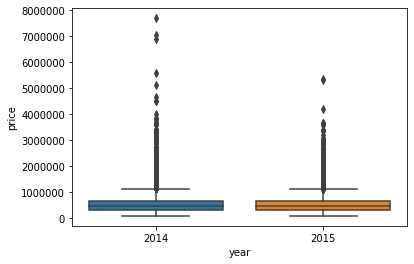

In [417]:
sns.boxplot(x='year',y='price',data=df)

#### Prices, more or less remained constant over the 2014 and 2015. Lets try for months!

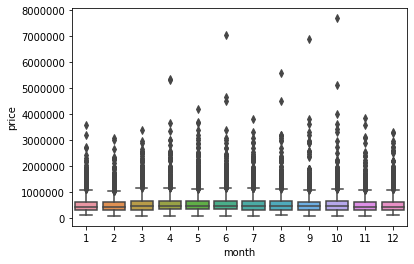

In [418]:
sns.boxplot(x='month',y='price',data=df)

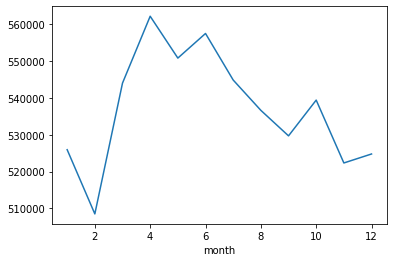

In [419]:
df.groupby('month').mean()['price'].plot()

### There is a distinct trend but not a large variation. Prices are changing by not more than \\$50k over the months which is small compared to our average price of houses at \\$1.5Mn

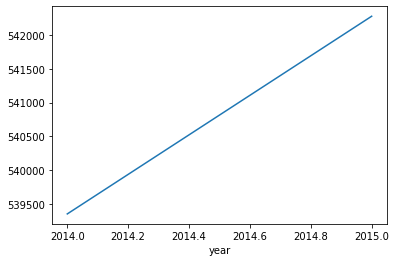

In [420]:
df.groupby('year').mean()['price'].plot()

### Price steadily increased over the course of the year, as expected. Go inflation!

### Since month and year are somehow weighing in on the price, let us retain the 2 columns for year and month and drop the existing date column from our DB

In [421]:
df = df.drop('date',axis=1)

### We have already seen that zip codes as pure numbers, do not a role in pricing (instead this would mislead the ML model). That being said, the zone in which these zip codes lie, viz. North, East, West, South, Central, plays a huge role.

#### We determine the zone based on the lat and long of the house location and add a column called 'zone' to our df and drop the zipcode column from our df

In [422]:
df = df.drop('zipcode',axis=1)

In [423]:
zonelist=[]

for i in range(len(df)):
    if df.iloc[i]['lat']<47.45:
        zonelist.append('South')
    elif df.iloc[i]['long']>-122.12:
        zonelist.append('East')   
    elif df.iloc[i]['lat']>47.65:
        zonelist.append('North')
    elif df.iloc[i]['long']<-122.25:
        zonelist.append('West')
    else:
        zonelist.append('Central')
        
df['zone']=zonelist

### Now that we have a categorical variable of zone, we use get_dummies to convert the categorical variable into dummy/indicator variables

In [424]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
0               0     0          3      7  ...              0      1955   
1               0     0          3      7  ...            400      1951   
2               0     0          3      6  ...              0      1933   
3               0     0          5      7  ...            910      1965   
4               0     0          3      8  ...              0      1987   
...           ...   ...        ...    ...  ...            ...       ...   
21592           0     0          3      8  ...              0      2009   
21593           0     0          3      8  ...              0      2014   
21594           0     0          3      7  ...              0      2009   
21595           0     0          3      8  ...              0      2004   
21596           0     0          3      7  ...              0      2008   

       yr_renovated      lat     long  sqft_living15  sqft_lot15  month  year  \
0                 0  47.5112 -122.257           1340        5650     10  2014   
1              1991  47.7210 -122.319           1690        7639     12  2014   
2                 0  47.7379 -122.233           2720        8062      2  2015   
3                 0  47.5208 -122.393           1360        5000     12  2014   
4                 0  47.6168 -122.045           1800        7503      2  2015   
...             ...      ...      ...            ...         ...    ...   ...   
21592             0  47.6993 -122.346           1530        1509      5  2014   
21593             0  47.5107 -122.362           1830        7200      2  2015   
21594             0  47.5944 -122.299           1020        2007      6  2014   
21595             0  47.5345 -122.069           1410        1287      1  2015   
21596             0  47.5941 -122.299           1020        1357     10  2014   

        zone  
0       West  
1      North  
2      North  
3       West  
4       East  
...      ...  
21592  North  
21593   West  
21594   West  
21595   East  
21596   West  

[21597 rows x 21 columns]

In [435]:
df_zones = pd.get_dummies(df['zone'])
df_copy = df.copy()
df = pd.concat([df_copy,df_zones],axis=1)
df = df.drop('zone',axis=1)

Let's look at the year the house was renovated

In [436]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

#### Most entries are 0 meaning the house was not renovated. We can keep this feature as is, since if a house is not renovated (yr_renovated = 0) it has a large negative weight and if it recently renovated (yr_renovated = 2014) it has large positive weight over the price. Thus there is no feature engineering needed for yr_renovated

Let's look at the area of the house basement

In [437]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

#### This feature is similar to the year feature. No basement is a huge downside and a larger basement is an equal upside to the house. Therefore we retain this feature too as is, since it is in the formal the ML model needs.

## At this point, we have completed EDA and feature engineering both. We now jump to getting the data for training and testing our model

### Scaling and Train Test Split

In [438]:
X = df.drop('price',axis=1)
y = df['price']

In [439]:
from sklearn.model_selection import train_test_split

In [440]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [441]:
from sklearn.preprocessing import MinMaxScaler

In [442]:
scaler = MinMaxScaler()

In [443]:
X_train= scaler.fit_transform(X_train)

In [444]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21592  360000.0         3       2.50         1530      1131     3.0   
21593  400000.0         4       2.50         2310      5813     2.0   
21594  402101.0         2       0.75         1020      1350     2.0   
21595  400000.0         3       2.50         1600      2388     2.0   
21596  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  Central  East  North  South  \
0               0     0          3      7  ...        0     0      0      0   
1               0     0          3      7  ...        0     0      1      0   
2               0     0          3      6  ...        0     0      1      0   
3               0     0          5      7  ...        0     0      0      0   
4               0     0          3      8  ...        0     1      0      0   
...           ...   ...        ...    ...  ...      ...   ...    ...    ...   
21592           0     0          3      8  ...        0     0      1      0   
21593           0     0          3      8  ...        0     0      0      0   
21594           0     0          3      7  ...        0     0      0      0   
21595           0     0          3      8  ...        0     1      0      0   
21596           0     0          3      7  ...        0     0      0      0   

       West  Central  East  North  South  West  
0         1        0     0      0      0     1  
1         0        0     0      1      0     0  
2         0        0     0      1      0     0  
3         1        0     0      0      0     1  
4         0        0     1      0      0     0  
...     ...      ...   ...    ...    ...   ...  
21592     0        0     0      1      0     0  
21593     1        0     0      0      0     1  
21594     1        0     0      0      0     1  
21595     0        0     1      0      0     0  
21596     1        0     0      0      0     1  

[21597 rows x 30 columns]

In [445]:
X_test = scaler.transform(X_test)

In [446]:
X_train.shape

(15117, 29)

In [447]:
X_test.shape

(6480, 29)

## Creating a Deep Learning ANN Model

In [448]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [449]:
model = Sequential()

#We add 4 hidden layers with 19 neurons each, using relu as the activation function
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
#And 1 output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [450]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=600)

Train on 15117 samples, validate on 6480 samples
Epoch 1/600
15117/15117 [==============================] - 4s 288us/sample - loss: 430229837878.3261 - val_loss: 418852499182.9333
Epoch 2/600
15117/15117 [==============================] - 1s 56us/sample - loss: 428442182735.8635 - val_loss: 412901958623.1309
Epoch 3/600
15117/15117 [==============================] - 1s 54us/sample - loss: 406465228600.8494 - val_loss: 364722935772.6025
Epoch 4/600
15117/15117 [==============================] - 1s 45us/sample - loss: 310603443052.6692 - val_loss: 218680060586.6667
Epoch 5/600
15117/15117 [==============================] - 1s 59us/sample - loss: 155643656046.6336 - val_loss: 105603391619.4765
Epoch 6/600
15117/15117 [==============================] - 1s 40us/sample - loss: 102536608363.8055 - val_loss: 95917615139.3975
Epoch 7/600
15117/15117 [==============================] - 1s 54us/sample - loss: 97439867449.0018 - val_loss: 92686732806.3210
Epoch 8/600
15117/15117 [==================

15117/15117 [==============================] - 1s 65us/sample - loss: 27820212923.8722 - val_loss: 27049454377.0864
Epoch 128/600
15117/15117 [==============================] - 1s 36us/sample - loss: 27736313393.2119 - val_loss: 27022483986.9630
Epoch 129/600
15117/15117 [==============================] - 1s 53us/sample - loss: 27717440930.2840 - val_loss: 26986618354.0938
Epoch 130/600
15117/15117 [==============================] - 1s 53us/sample - loss: 27661864990.7532 - val_loss: 26965105039.4864
Epoch 131/600
15117/15117 [==============================] - 1s 57us/sample - loss: 27606012089.8739 - val_loss: 26924537264.3556
Epoch 132/600
15117/15117 [==============================] - 1s 75us/sample - loss: 27609130381.5561 - val_loss: 26895942355.1210
Epoch 133/600
15117/15117 [==============================] - 1s 55us/sample - loss: 27564272820.3194 - val_loss: 26854142938.0741
Epoch 134/600
15117/15117 [==============================] - 1s 49us/sample - loss: 27493289094.1896 - v

15117/15117 [==============================] - 1s 44us/sample - loss: 24827083077.6858 - val_loss: 24182302578.4099
Epoch 254/600
15117/15117 [==============================] - 1s 54us/sample - loss: 24774811544.8684 - val_loss: 24155187301.1358
Epoch 255/600
15117/15117 [==============================] - 1s 37us/sample - loss: 24782456279.6957 - val_loss: 24078270372.9778
Epoch 256/600
15117/15117 [==============================] - 1s 37us/sample - loss: 24757874595.8082 - val_loss: 24086754781.8667
Epoch 257/600
15117/15117 [==============================] - 1s 38us/sample - loss: 24720895387.3747 - val_loss: 24153058407.6642
Epoch 258/600
15117/15117 [==============================] - 1s 39us/sample - loss: 24693095080.7700 - val_loss: 24045533204.2272
Epoch 259/600
15117/15117 [==============================] - 1s 42us/sample - loss: 24675728680.8970 - val_loss: 24039103343.8815
Epoch 260/600
15117/15117 [==============================] - 1s 42us/sample - loss: 24621537918.5013 - v

15117/15117 [==============================] - 1s 40us/sample - loss: 20766639458.0681 - val_loss: 20489657670.1630
Epoch 380/600
15117/15117 [==============================] - 1s 40us/sample - loss: 20710108085.5556 - val_loss: 20352458575.0123
Epoch 381/600
15117/15117 [==============================] - 1s 40us/sample - loss: 20717964838.2383 - val_loss: 20399387726.3802
Epoch 382/600
15117/15117 [==============================] - 1s 40us/sample - loss: 20651361821.2968 - val_loss: 20431697136.1975
Epoch 383/600
15117/15117 [==============================] - 1s 40us/sample - loss: 20669787453.7096 - val_loss: 20351065975.4667
Epoch 384/600
15117/15117 [==============================] - 1s 43us/sample - loss: 20602977184.9293 - val_loss: 20243299456.9481
Epoch 385/600
15117/15117 [==============================] - 1s 43us/sample - loss: 20583966593.4648 - val_loss: 20197208503.9407
Epoch 386/600
15117/15117 [==============================] - 1s 40us/sample - loss: 20520317559.3888 - v

Epoch 442/600
15117/15117 [==============================] - 1s 40us/sample - loss: 18987570674.2153 - val_loss: 18959076531.5160
Epoch 443/600
15117/15117 [==============================] - 1s 40us/sample - loss: 18952024046.6590 - val_loss: 18813102363.1802
Epoch 444/600
15117/15117 [==============================] - 1s 40us/sample - loss: 18931690710.7982 - val_loss: 18824778547.2000
Epoch 445/600
15117/15117 [==============================] - 1s 40us/sample - loss: 18919997563.5547 - val_loss: 18800822426.2321
Epoch 446/600
15117/15117 [==============================] - 1s 40us/sample - loss: 18899713895.3179 - val_loss: 18803511139.2395
Epoch 447/600
15117/15117 [==============================] - 1s 40us/sample - loss: 18863914555.5081 - val_loss: 18755396266.6667
Epoch 448/600
15117/15117 [==============================] - 1s 45us/sample - loss: 18858814859.2530 - val_loss: 18782552956.5235
Epoch 449/600
15117/15117 [==============================] - 1s 51us/sample - loss: 188367

15117/15117 [==============================] - 1s 43us/sample - loss: 17629865556.6390 - val_loss: 17770725446.7951
Epoch 506/600
15117/15117 [==============================] - 1s 39us/sample - loss: 17589736117.0306 - val_loss: 17725691287.0716
Epoch 507/600
15117/15117 [==============================] - 1s 40us/sample - loss: 17574534358.8659 - val_loss: 17725888603.0222
Epoch 508/600
15117/15117 [==============================] - 1s 40us/sample - loss: 17557508912.7208 - val_loss: 17696344989.3926
Epoch 509/600
15117/15117 [==============================] - 1s 41us/sample - loss: 17574970308.6612 - val_loss: 17648035609.9160
Epoch 510/600
15117/15117 [==============================] - 1s 39us/sample - loss: 17541115851.0964 - val_loss: 17661925120.6321
Epoch 511/600
15117/15117 [==============================] - 1s 39us/sample - loss: 17494676628.8211 - val_loss: 17776645324.8000
Epoch 512/600
15117/15117 [==============================] - 1s 40us/sample - loss: 17521316081.0806 - v

In [451]:
#Recording the MSE losses in a new df
losses = pd.DataFrame(model.history.history)
losses

loss      val_loss
0    4.302298e+11  4.188525e+11
1    4.284422e+11  4.129020e+11
2    4.064652e+11  3.647229e+11
3    3.106034e+11  2.186801e+11
4    1.556437e+11  1.056034e+11
..            ...           ...
595  1.653495e+10  1.686622e+10
596  1.650676e+10  1.690793e+10
597  1.648524e+10  1.686934e+10
598  1.649860e+10  1.679789e+10
599  1.645114e+10  1.680169e+10

[600 rows x 2 columns]

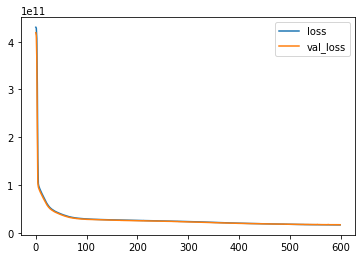

In [452]:
losses.plot()

# Evaluation on Test Data

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [453]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [455]:
predictions = model.predict(X_test)

In [495]:
#Finding the MEA of our predictions
mean_absolute_error(y_test,predictions)

75927.22198832947

In [494]:
#Finding the RMSE of our predictions
np.sqrt(mean_squared_error(y_test,predictions))

129621.33864392636

### Considering the avg cost of houses at \\$5.4M, an error of \\$129k seems acceptable enough

In [475]:
explained_variance_score(y_test,predictions)

0.8734166862841042

### 0.87 of explained variance score implies a very strong corelation between our predicted and true values

In [476]:
y_test.mean()

535139.1662037037

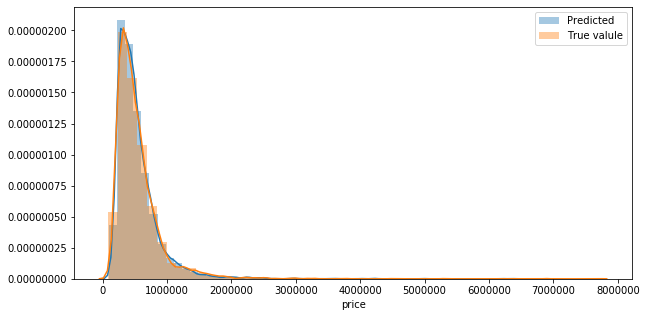

In [489]:
plt.figure(figsize=(10,5))
sns.distplot(predictions,label='Predicted')
sns.distplot(y_test,label='True valule')
plt.legend()

### Histogram of the predictions is almost same as histogram of the True values, which is good!

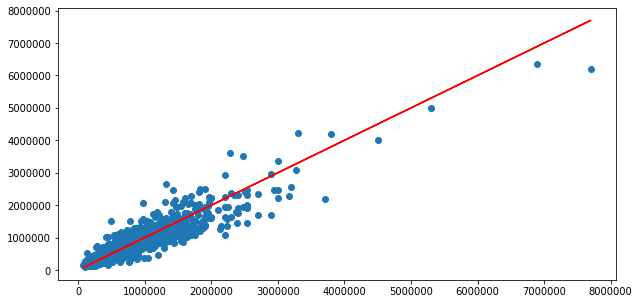

In [490]:
plt.figure(figsize=(10,5))

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

### Our predictions are well along the actual price (red) line and are especially accurate for majority of the data. 
### Error is high only for extremely high valued properties which is expected

In [491]:
#Let's plot a histogram of the error values
errors = y_test.values.reshape(6480, 1) - predictions

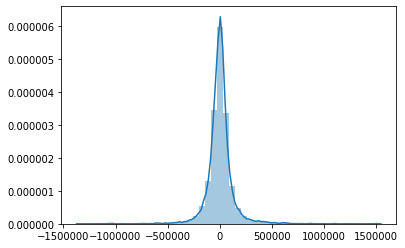

In [492]:
sns.distplot(errors)

### Errors are symmetrically distrubuted across 0. This proves that we have made a good ANN model!

# Congratulations are in order for building an exceedingly good model!!

<img src="giphy.gif" width="350" align="center">